<a href="https://colab.research.google.com/github/thisisreallife/Medium/blob/master/Outlier_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Outlier can decrease power

In [128]:
# several params need to consider
## relative_effect_size. Fixed at 1.2
## outlier size = np.linspace(0,200,num = 100)
## sample size of data. Fixed at 100 per sample
## the percent of outlier. Fixed at 1
relative_effect_size =  (1.2-0)/1 
outlier_size_list = np.linspace(0,200,num = 100)
res = []

for outlier_size in outlier_size_list:    
    data0 = stats.norm.rvs(0, 1, 100)
    data1 = stats.norm.rvs(0+relative_effect_size, 1, 100)
    data_o = np.append(data1, relative_effect_size*outlier_size)
    res.append(stats.ttest_ind(data_o, data0))

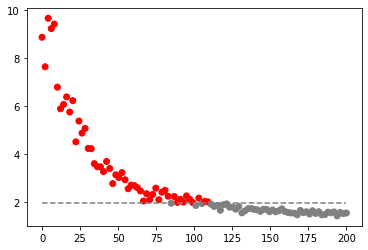

In [129]:
plt.scatter(outlier_size_list, [i[0] for i in res], color = ['red' if abs(i[0])>1.96 else 'grey' for i in res])
plt.hlines(1.96, 0, 200, linestyles = 'dashed', color = 'grey')

# Outlier can increase Type I Error

In [130]:
# several params need to consider
## relative_effect_size. Fixed at 1.2
## outlier size = np.linspace(0,200,num = 100)
## sample size of data. Fixed at 100 per sample
## the percent of outlier. Fixed at 1
relative_effect_size =  1
outlier_size_list = np.linspace(0,5000,num = 100)
res = []

for outlier_size in outlier_size_list:    
    data0 = stats.norm.rvs(0, 10, 1000)
    data1 = stats.norm.rvs(0, 10, 1000)
    outliers = np.array([relative_effect_size*outlier_size]*5)
    data_o = np.append(data1, outliers)
    res.append(stats.ttest_ind(data_o, data0))

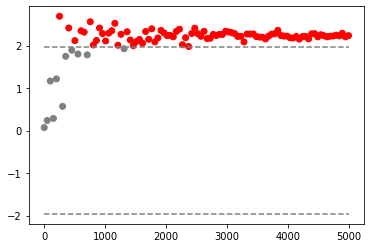

In [131]:
plt.scatter(outlier_size_list, [i[0] for i in res], color = ['red' if abs(i[0])>1.96 else 'grey' for i in res])
plt.hlines(1.96, min(outlier_size_list), max(outlier_size_list), linestyles = 'dashed', color = 'grey')
plt.hlines(-1.96, min(outlier_size_list), max(outlier_size_list), linestyles = 'dashed', color = 'grey')